# Intro

In [20]:
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
get_ipython().ast_node_interactivity = 'all'
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

# Set seed

In [19]:
seed = 23

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# Acknowledgement

[Supp code and exampels](https://github.com/joosthub/PyTorchNLPBookm) 
Perface > using code example: ""

> “ Natural Language Processing with PyTorch by Delip Rao and Brian McMahan (O’Reilly). Copyright 2019, Delip Rao and Brian McMahan, 978-1-491-97823-8.”

# One bot / Binary encoding

Example 1-1. Generating a “collapsed” one-hot or binary representation using scikit-learn

array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]], dtype=int64)

<AxesSubplot:>

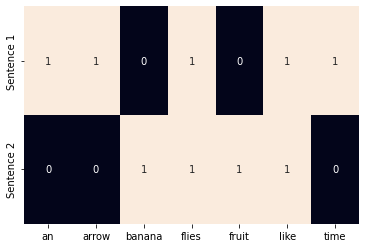

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
 
sentence1 = 'Time flies flies like an arrow.'
sentence2 = 'Fruit flies like a banana.'
corpus = [sentence1, sentence2]
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
#note here a, an are treated as one word, so only an is shwon
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab, # cbar is for the heat value illustartion
            yticklabels=['Sentence 1', 'Sentence 2'])


# TF-IDF representation
Example 1-2. Generating a TF-IDF representation using scikit-learn

<AxesSubplot:>

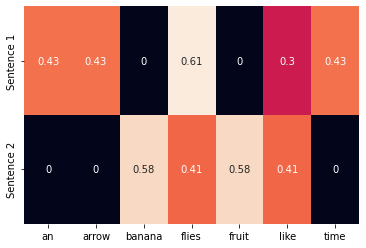

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])

# Pytorch Basic

In [ ]:
#!conda install pytorch torchvision -c pytorch

def p(t=''):
    print('-------'+t+'-------')
    print()

## Describe()

In [10]:
def describe(x):
    """summarise properties of a tensor x

    Args:
        x (tensor): 
    """
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))
    print()

In [3]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Random normal dist

In [4]:
describe(torch.rand(2, 3))   # uniform random
describe(torch.randn(2, 3))  # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.5866, 0.0962, 0.1946],
        [0.3136, 0.0838, 0.3909]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 0.2589,  0.4765, -0.0993],
        [-0.8002, -0.0610, -0.3848]])


## Tensor from list

In [5]:
x = torch.Tensor([[1, 2, 3],  
                 [4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## Tensfor from numpy

In [15]:
import torch
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.9093, 0.7515, 0.5657],
        [0.5321, 0.7644, 0.4786]], dtype=torch.float64)



## Tensor properties

In [18]:
x = torch.FloatTensor([[1, 2, 3],  
                    [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3], 
                 [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float() 
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])



## Tensor Operations

randn, add, arange, view/reshape

In [36]:
p('randn')
x = torch.randn(2, 3)
x

p('add')
describe(torch.add(x, x))
describe(x + x)

p('arange')
x = torch.arange(6)
x

p('view/reshape')

x = x.view(2, 3)
describe(x)

p('sum')
describe(torch.sum(x, dim=0))

p('transpose')

describe(torch.transpose(x, 0, 1))





-------randn-------



tensor([[-0.5208, -0.1943,  0.2444],
        [-0.1555, -0.2432, -0.8521]])

-------add-------

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.0416, -0.3887,  0.4888],
        [-0.3111, -0.4865, -1.7041]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.0416, -0.3887,  0.4888],
        [-0.3111, -0.4865, -1.7041]])

-------arange-------



tensor([0, 1, 2, 3, 4, 5])

-------view/reshape-------

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])

-------sum-------

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])

-------transpose-------

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])



## Slicing and indexing a tensor

In [39]:
x = torch.arange(6).view(2, 3)
describe(x)

describe(x[:1, :2]) # row 0, first two cols

describe(x[0, 1])


Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
1



## Complex indexing: noncontiguous indexing of a tensor

### index_select

In [43]:
# indices = torch.LongTensor([0, 2]) 
indices = torch.tensor([0,2])
describe(torch.index_select(x, dim=1, index=indices)) # 0, 2th col only

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])



### particular row + col

In [60]:
x
p()
row_indices = torch.arange(2).long()
row_indices
p()
col_indices = torch.LongTensor([0, 1])
col_indices
p('particular row col elements')
describe(x[row_indices, col_indices]) # row0,col0 +  row1,col1
p('cat based rows')
describe(torch.cat([x, x], dim=0))
p('stack') # stack another depth, depth: 2, row: 2, col: 2
describe(torch.stack([x, x]))




tensor([[0, 1, 2],
        [3, 4, 5]])

--------------



tensor([0, 1])

--------------



tensor([0, 1])

-------particular row col elements-------

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])

-------cat based rows-------

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])

-------stack-------

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])



### Linear algebra: add, multiplication

In [68]:
x2 = torch.ones(3, 2)
x2
x2[:, 1] += 1 # all row, col 1
describe(x2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])



### mm, type must be the same

In [76]:
x1 = torch.arange(6).view(2, 3).float()
describe(x1)
describe(x2)

describe(torch.mm(x1, x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])



## Tensors and Computational Graphs


### Creating tensors for gradient bookkeeping

In [77]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

True


### requires_grad   

"When you create a tensor with requires_grad=True, you are requiring PyTorch to manage **bookkeeping** information that computes gradients. 
First, PyTorch will keep track of the values of the **forward pass**. Then, at the end of the computations, a single **scalar** is used to compute a backward pass. The **backward pass** is initiated by using the backward() method on a tensor resulting from the evaluation of a loss function. The backward pass computes a gradient value for a tensor object that participated in the forward pass."


In [80]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

p()

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)

False
--------------

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0

False


### .grad

the gradient is a value that represents the **slope** of a function output with respect to the **function input**
**Optimizers** use the .grad variable to **update** the values of the **parameters**.

## CUDA Tensors
- To use a GPU, you need to first allocate the tensor on the GPU’s memory
- Before it is run on CPU.
- The CUDA API was created by **NVIDIA** and is limited to use on only **NVIDIA GPUs**

Transfering the tensor from the CPU to the GPU while maintaining its underlying type. The preferred method in PyTorch is to be device agnostic and write code that works whether it’s on the GPU or the CPU.

In [6]:
print (torch.cuda.is_available())

# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

True
cuda


tensor([0.], device='cuda:0')

In [12]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.9864, 0.5348, 0.2743],
        [0.2985, 0.3224, 0.7795],
        [0.5672, 0.4135, 0.9058]], device='cuda:0')



### Mixing CUDA tensors with CPU-bound tensors

it is **expensive** to move data back and forth from the GPU. Therefore, the typical procedure involves doing many of the **parallelizable** computations on the GPU and then transferring just the **final result** back to the CPU.

In [13]:
y = torch.rand(3, 3)
x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### convert to same device

In [14]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[1.1606, 1.0611, 0.8188],
        [0.4594, 0.7113, 0.9905],
        [0.8951, 0.5917, 1.8479]])

## More torch API

### (UN)SQUEEZE
- UNSQUEEZE: Returns a new tensor with a dimension of size one **inserted** at the specified position.
- Returns a tensor with all the dimensions of input of size 1 **removed**.

In [22]:
torch.arange(3, 7)

tensor([3, 4, 5, 6])

### RAND
Returns a tensor filled with random numbers from a uniform distribution on the interval **[0, 1)**

### .normal_()
convert to normal distribution

### expand()
making copies of existance ones and expand horizontally


# Feature engineering

## NLTK

In [1]:
from nltk.tokenize import TweetTokenizer

tweet = u"Snow White and the Seven Degrees \
    #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


## N-grams
sliding window

N-grams are fixed-length (n) consecutive token sequences occurring in the text.

In [2]:
def n_grams(text, n):
    '''
    takes tokens or text, returns a list of n-grams
    '''
    return [text[i:i+n] for i in range(len(text)-n+1)]

cleaned = ['mary', ',', "n't", 'slap', 'green', 'witch', '.']
print(n_grams(cleaned, 3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


## lemmatization

Lemmas are root forms of words. Go -> went, goes, etc.

## Process tweets example

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import numpy as np # Library for linear algebra and math utils


def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    #tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

## Categorizing Words: POS Tagging
part-of-speech (POS) tagging


# Activiation Function

## Sigmoid

$$ f(x) = \frac{1}{1 + e^{-x}} $$ 

[0, 1]

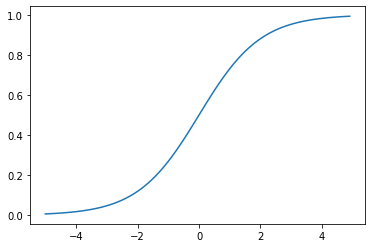

In [4]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show();

## vanishing/exploding gradient
the sigmoid function saturates (i.e., produces
extreme valued outputs) very quickly and for a majority of the inputs. This can
become a problem because it can lead to the gradients becoming either zero or
diverging to an overflowing floating-point value. These phenomena are also
known as vanishing gradient problem and exploding gradient problem

As a consequence, it is rare to see sigmoid units used in neural
networks other than at the **output**, where the squashing property allows one to
interpret outputs as **probabilities**

## Tanh

$$ f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$ 

[-1, 1]

maps the set of real values from (–∞, +∞) to
the range [-1, +1].

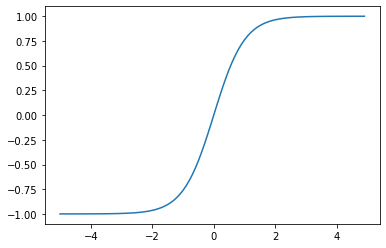

In [6]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Relu

rectified linear unit  
clipping the negative values to zero,

$$ f(x) = max(0, x) $$ 

[0, +inf]

The clipping effect of ReLU that helps with the **vanishing gradient** problem can
also become an issue, where over time certain outputs in the network can simply
become **zero and never revive again**. This is called the “dying ReLU” problem.

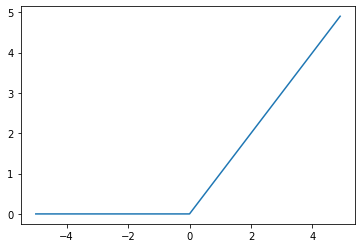

In [9]:
relu = torch.nn.ReLU()
x = torch.arange(-5.,5., 0.1)
y = relu(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

To mitigate that effect, variants such as the **Leaky ReLU** and **Parametric ReLU**
(PReLU) activation functions have proposed, where the **leak** coefficient a is a
**learned** parameter.

$$ f(x) = max(x, ax) $$ 

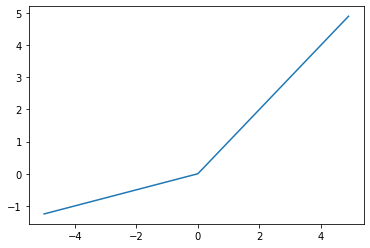

In [14]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy()) # since y requires .grad so detach it to type cast numpy andavoid error
plt.show()

## Softmax

![](imgs/softmax.png)  
[0, 1]

In [20]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
x_input
y_output
torch.sum(y_output, dim=1) # sum to one

tensor([[ 0.4676, -0.8147, -0.5850]])

tensor([[0.6148, 0.1706, 0.2146]])

tensor([1.])

# Loss Functions

## Mean Squared Error Loss

![](imgs/mse.png)

In [21]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.3464, grad_fn=<MseLossBackward0>)


## Categorical Cross-Entropy Loss

![](imgs/ccel.png)

\#note  
compute how **different** two **distributions** are.  
We want the probability of the
**correct** class to be **close to 1**, whereas the **other** classes have a probability **close
to 0**. ***Log(1) = 0***
Product = sum of log

In [5]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
outputs
targets
print(loss)

tensor([[ 1.3654, -0.6839, -1.2567,  0.6865, -0.1485],
        [ 1.6060, -1.1797,  0.6773, -0.0960, -0.3345],
        [ 0.5175, -0.5598, -0.3623, -0.0477,  0.8693]], requires_grad=True)

tensor([1, 0, 3])

tensor(1.7233, grad_fn=<NllLossBackward0>)


For above, a vector of random values is first used to simulate network
output. Then, the ground truth vector, called targets, is created as a vector of
integers because PyTorch’s implementation of CrossEntropyLoss() assumes
that each input has one particular **class**, and each class has a unique **index**. This
is why targets has **three** elements: an index representing the **correct class** for
each **input**. From this assumption, it performs the computationally more efficient
operation of indexing into the model output

## why use e in the formula?

1. There is a limit to how small or how large a number can be.
2. If input negative -> log gives exponentially small number, if positive, exponentially large number.
3. Network’s output is assumed to be the vector just prior to applying the softmax
function
4. The log function is the inverse of the exponential function,
and log(exp(x)) is just equal to x.

**Conclusion**  
mathematical simplifications are made assuming the **exponential**
function that is the **core** of the softmax function and the **log** function that is used
in the cross-entropy computations in order to be more numerically **stable** and
**avoid** really **small** or really **large** numbers (log property).

## Binary cross-entropy loss

In [9]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).reshape(4, 1)
probabilities
targets
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.3914],
        [0.2337],
        [0.5652],
        [0.6740]], grad_fn=<SigmoidBackward0>)

tensor([[1.],
        [0.],
        [1.],
        [0.]])

tensor([[0.3914],
        [0.2337],
        [0.5652],
        [0.6740]], grad_fn=<SigmoidBackward0>)
tensor(0.7239, grad_fn=<BinaryCrossEntropyBackward0>)


# Supervised Training

## Overview

Supervised learning requires the following: a **model**, a
**loss** function, **training** data, and an **optimization** algorithm. The training data for
supervised learning is pairs of observations and targets; the model computes
predictions from the observations, and the loss measures the error of the
predictions as compared to the targets. The goal of the training is to use the
8
gradient-based optimization algorithm to adjust the model’s parameters so that
the losses are as low as possible.

## Optimiser

While the model produces predictions and the loss function measures
the error between predictions and targets, the optimizer **updates** the **weights** of
the model using the **error signal**. In its simplest form, there is a single
hyperparameter that controls the update behavior of the optimizer. This
hyperparameter, called a learning rate, controls how much impact the error
signal has on updating the weights.

## Instantiating the Adam optimizer

### Gradient Descent overview

1. any **bookkeeping** information, such as gradients, currently stored inside the model (perceptron) object is **cleared** with a function named zero_grad().
2. make **prediction**: the model computes outputs (y_pred) given the input data (x_data).
3. the **loss** is computed by comparing model outputs (y_pred) to intended targets (y_target).  
The PyTorch loss object (**criterion**) has a function named backward() that iteratively propagates the loss backward through the computational graph and notifies each parameter of its gradient.

# Toy Example

https://github.com/joosthub/PyTorchNLPBook/blob/master/chapters/chapter_3/Chapter-3-Diving-Deep-into-Supervised-Training.ipynb

## Perceptron

In [ ]:
class Perceptron(nn.Module):
    """ A Perceptron is one Linear layer """

    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the MLP

        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
        Returns:
            the resulting tensor. tensor.shape should be (batch, 1)
        """
        return torch.sigmoid(self.fc1(x_in))

## Training

In [ ]:
lr = 0.01
input_dim = 2

batch_size = 1000
n_epochs = 12
n_batches = 5

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

perceptron = Perceptron(input_dim=input_dim)
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)
bce_loss = nn.BCELoss()

losses = []

x_data_static, y_truth_static = get_toy_data(batch_size)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, title='Initial Model State')
plt.axis('off')
#plt.savefig('initial.png')

change = 1.0
last = 10.0
epsilon = 1e-3
epoch = 0
while change > epsilon or epoch < n_epochs or last > 0.3:
#for epoch in range(n_epochs):
    for _ in range(n_batches):

        optimizer.zero_grad()
        x_data, y_target = get_toy_data(batch_size)
        y_pred = perceptron(x_data).squeeze()
        loss = bce_loss(y_pred, y_target)
        loss.backward()
        optimizer.step()
        
        
        loss_value = loss.item()
        losses.append(loss_value)

        change = abs(last - loss_value)
        last = loss_value
               
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, epoch=epoch, 
                      title=f"{loss_value}; {change}")
    plt.axis('off')
    epoch += 1
    #plt.savefig('epoch{}_toylearning.png'.format(epoch))

# Vocab, vectoriser, dataloader

The **Vocabulary** coordinates the **integer-to-token mappings** that
we discussed in “Observation and Target Encoding”. We use a Vocabulary both
for mapping the text tokens to integers and for mapping the class labels to
integers. Next, the **Vectorizer** encapsulates the **vocabularies** and is responsible
for ingesting string data, like a review’s text, and **converting** it to numerical
**vectors** that will be used in the training routine. We use the final assisting class,
PyTorch’s **DataLoader**, to group and **collate** the individual vectorized data
points into **minibatches**

# The Yelp Review Dataset

In 2015, Yelp held a contest in which it asked participants to predict the rating of
a restaurant given its review. Zhang, Zhao, and Lecun (2015) simplified the
dataset by converting the 1- and 2-star ratings into a “negative” sentiment class
and the 3- and 4-star ratings into a “positive” sentiment class, and split it into
560,000 training samples and 38,000 testing samples.

## Note

we use a “light” version of the
dataset, which is derived by selecting 10% of the training samples as the full
dataset. This has two consequences. First, using a small dataset makes the
training–testing loop fast, so we can experiment quickly.

From this smaller subset, we split the dataset into three partitions: one for
training, one for validation, and one for testing.

## Creating training, validation, and testing splits

In [ ]:
# Split the subset by rating to create new train, val, and test splits
by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_rating.items()):
    np.random.shuffle(item_libst)
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)
    # Give data point a split attribute
    for item in item_list[:n_train]:
    item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'
    for item in item_list[n_train+n_val:n_train+n_val+n_test]:
    item['split'] = 'test'
    # Add to final list
    final_list.extend(item_list)
    final_reviews = pd.DataFrame(final_list)

## Minimally cleaning the data

In [ ]:
def preprocess_text(text):

    text = text.lower()
    # adding whitespace around punctuation symbols: 'a!b' => 'a ! b'
    text = re.sub(r"([.,!?])", r" \1 ", text)
    # removing extraneous symbols that aren’t punctuation for all the splits
    # E.g. @ will be removed
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text
final_reviews.review = final_reviews.review.apply(preprocess_text)

## The Vocabulary

- from text to vectorized minibatch is to map each **token** to
a **numerical** version of itself.
- The standard methodology is to have a **bijection—a**
mapping that can be reversed—between the tokens and integers. In Python, this is simply **two** **dictionaries**.
- The Vocabulary class not only manages this
bijection—allowing the user to **add new tokens** and have the i**ndex
autoincrement**—but also handles a special token called UNK, which stands for **“unknown**.
- we will even explicitly **restrict** **infrequent** tokens from our Vocabulary so that there are **UNK** tokens in our **training** routine
------------   
- add_token() is called to add new tokens to the Vocabulary, -
- lookup_token() when retrieving the index for a token, and 
- lookup_index() when retrieving the token corresponding to a specific index.
------------
The Vocabulary class **maintains** token to integer mapping needed
for the rest of the machine learning pipeline

### Class code

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
            add_unk (bool): a flag that indicates whether to add the UNK token
            unk_token (str): the UNK token to add into the Vocabulary
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

## Vectorizer

- second stage of going from a **text** dataset to a **vectorized** minibatch is to **iterate** through the tokens of an input data point and convert each token to its integer form
- utilizes Python’s @classmethod decorator for the method **from_dataframe()** to **indicate** an **entry** point to **instantiating** the Vectorizer
- from_dataframe() iterates over the rows of a Pandas DataFrame with two goals.
  - first goal is to **count** the **frequency** of all tokens present in
the dataset.
  - The second goal is to **create** a **Vocabulary** that only uses tokens that **are** as **frequent** as a provided keyword argument to the method, cutoff. Effectively, this method is finding **all words** that occur **at least cutoff times** and **adding** them to the **Vocabulary**.
  - Because the UNK token is also added to the Vocabulary, any **words** that are **not added** will have the **unk_index** when the Vocabulary’s **lookup_token**() method is called

-----------------
The method **vectorize**() encapsulates the core functionality of the
Vectorizer.
- It takes as an argument a string representing a review and returns a **vectorized representation** of the review.
- one-hot representation is used below.
- limitations.
  - sparse—the number of unique words in the review will always be far less than the number of unique words in the Vocabulary
  - discards the order in which the words appeared in the review (the “bag of words” approach).



### Class code

In [ ]:
class ReviewVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """Create a collapsed one-hit vector for the review
        
        Args:
            review (str): the review 
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding 
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # Add ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """Instantiate a ReviewVectorizer from a serializable dictionary
        
        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """Create the serializable dictionary for caching
        
        Returns:
            contents (dict): the serializable dictionary
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

## A PyTorch Dataset class

final stage of the text-to-vectorized-minibatch pipeline is to actually **group** the vectorized data points
- we wrap the DataLoader in a **generate_batches**() function, which is a generator to conveniently **switch** the data between the CPU and the GPU.

### Class code

In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
            review_df (pandas.DataFrame): the dataset
            vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            review_csv (str): location of the dataset
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train']
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df))
    
    @classmethod
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            review_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(review_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of ReviewVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe 
        
        Args:
            split (str): one of "train", "val", or "test"
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]

        review_vector = \
            self._vectorizer.vectorize(row.review)

        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.rating)

        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size  
    
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will 
      ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

## Perceptron Classifier

- numerical stability issues with applying a sigmoid and then using this loss function.
- Solution: use **BCEWithLogitsLoss**(), To use  this loss function, the output should not have the sigmoid function applied

### Class code

In [ ]:
class ReviewClassifier(nn.Module):
    """ a simple perceptron-based classifier """
    def __init__(self, num_features):
        """
        Args:
        num_features (int): the size of the input feature vector
        """
        super(ReviewClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features=num_features,
        out_features=1)
    def forward(self, x_in, apply_sigmoid=False):
        """The forward pass of the classifier
        Args:
        x_in (torch.Tensor): an input data tensor
        x_in.shape should be (batch, num_features)
        apply_sigmoid (bool): a flag for the sigmoid activation
        should be false if used with the cross-entropy losses
        Returns:
        the resulting tensor. tensor.shape should be (batch,).
        """
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = F.sigmoid(y_out)
        return y_out

# Training Route

## args - hyperparam & program options

In [ ]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='data/yelp/reviews_with_splits_lite.csv',
    save_dir='model_storage/ch3/yelp/',
    vectorizer_file='vectorizer.json',
    # No model hyperparameters
    # Training hyperparameters
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # Runtime options omitted for space
)

## Helper: Initial/update train state, 

In [ ]:
def make_train_state(args):
    return {'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1}
train_state = make_train_state(args)
if not torch.cuda.is_available():
    args.cuda = False
args.device = torch.device("cuda" if args.cuda else "cpu")
# dataset and vectorizer
dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer = dataset.get_vectorizer()
# model
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device)
# loss and optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)

## bare-bones training loop

an **inner** loop over minibatches in the dataset, and an **outer** loop, which repeats the inner loop a number of times.
In the inner loop, **losses** are computed for each **minibatch**, and the optimizer is used to update the model parameters.

----------------

Given how we’ve constructed our dataset, the **split** should always be set **before** **generate_batches**() is called

-----------------

- The .eval() method makes the model parameters **immutable** and **disables** **dropout**.
- disables computation of the **loss** and **propagation** of gradients back to the parameters
  - This is important because we do not want the model **adjusting** its parameters relative to **validation** data. Instead, we want this data to serve as a measure of how well the model is performing.

### code

In [ ]:
for epoch_index in range(args.num_epochs):
    train_state['epoch_index'] = epoch_index

    # Iterate over training dataset

    # setup: batch generator, set loss and acc to 0, set train mode on
    dataset.set_split('train') # train for now, then to 'val' later when we want to measure model performance at the end of the epoch
    batch_generator = generate_batches(dataset, 
                                        batch_size=args.batch_size, 
                                        device=args.device)
    running_loss = 0.0
    running_acc = 0.0
    # indicate that the model is in “training mode” and the model parameters are mutable
    # also enables regularization mechanisms like dropout
    classifier.train() 
    
    for batch_index, batch_dict in enumerate(batch_generator):
        # the training routine is these 5 steps:

        # --------------------------------------
        # step 1. zero the gradients
        optimizer.zero_grad()

        # step 2. compute the output
        y_pred = classifier(x_in=batch_dict['x_data'].float())

        # step 3. compute the loss
        loss = loss_func(y_pred, batch_dict['y_target'].float())
        loss_t = loss.item()
        running_loss += (loss_t - running_loss) / (batch_index + 1)

        # step 4. use loss to produce gradients
        # resulting in gradients being propagated to each parameter.
        loss.backward()

        # step 5. use optimizer to take gradient step
        optimizer.step()
        # -----------------------------------------
        # compute the accuracy
        acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
        running_acc += (acc_t - running_acc) / (batch_index + 1)

        # update bar
        train_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
        # The training state is first updated with the final loss and accuracy values.
        train_bar.update() 

    train_state['train_loss'].append(running_loss)
    train_state['train_acc'].append(running_acc)

## Test set


Different between **val** & **test**:
- the test set should be run as **little** as possible. 
- Each time you run a trained model on the test set, make a new model decision (such as changing the size of the layers), and remeasure the new retrained model on the test set, you are **biasing** your modeling decisions toward the **test** data.

In [ ]:
dataset.set_split('test')
batch_generator = generate_batches(dataset,
                    batch_size=args.batch_size,
                    device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred = classifier(x_in=batch_dict['x_data'].float())
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'].float())
    loss_batch = loss.item()
    running_loss += (loss_batch - running_loss) / (batch_index + 1)
    # compute the accuracy
    acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_batch - running_acc) / (batch_index + 1)
    train_state['test_loss'] = running_loss
    train_state['test_acc'] = running_acc

## Inference: Printing the prediction

In [ ]:
def predict_rating(review, classifier, vectorizer,
                    decision_threshold=0.5):
    """Predict the rating of a review
    Args:
        review (str): the text of the review
        classifier (ReviewClassifier): the trained model
        vectorizer (ReviewVectorizer): the corresponding vectorizer
        decision_threshold (float): The numerical boundary which
                                    separates the rating classes
    """
    review = preprocess_text(review)
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    result = classifier(vectorized_review.view(1, -1))
    probability_value = F.sigmoid(result).item()
    index = 1
    if probability_value < decision_threshold:
        index = 0
    return vectorizer.rating_vocab.lookup_index(index)
test_review = "this is a pretty awesome book"
prediction = predict_rating(test_review, classifier, vectorizer)
print("{} -> {}".format(test_review, prediction)

## Inspecting model weights

In [ ]:
# Sort weights
fc1_weights = classifier.fc1.weight.detach()[0]
_, indices = torch.sort(fc1_weights, dim=0, descending=True)
indices = indices.numpy().tolist()

# Top 20 words
print("Influential words in Positive Reviews:")
print("--------------------------------------")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
    
""" Oupput:
Influential words in Positive Reviews:
--------------------------------------
great
awesome
amazing
love
friendly
delicious
best
excellent
...
"""

# Top 20 negative words
print("Influential words in Negative Reviews:")
print("--------------------------------------")
indices.reverse()
for i in range(20):
print(vectorizer.review_vocab.lookup_index(indices[i]))

""" output
Influential words in Negative Reviews:
--------------------------------------
worst
horrible
mediocre
terrible
not
rude
"""

## General utilities: seed, mkdir

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

# More